# Day 5

## Part 1

- There are a series of complicated mappings defined by the puzzle input
- Find the lowest location number of all the input seed numbers

In [73]:
from copy import deepcopy
from matplotlib import pyplot as plt
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown
)

In [74]:
parser = ParseConfig('\n\n', ParseConfig(' map:\n',
    [str, ParseConfig('\n', ParseConfig(' ', int))]
))

parsed_data = parse_from_file('puzzle_input\\day_5.txt', parser)

# seeds have their own format
temp =  parsed_data[0][0].split(': ')[-1]
seeds = [int(value) for value in temp.split(' ')]
# disregard the seeds item leaving the other mappings
mappings = parsed_data[1:]

print(f'seeds: {str(seeds)[:60]}...')
print(f'{str(mappings[0])[:60]}...')

seeds: [3429320627, 235304036, 1147330745, 114559245, 1684000747, 4...
['seed-to-soil', [[583826644, 2288418886, 120919689], [26667...


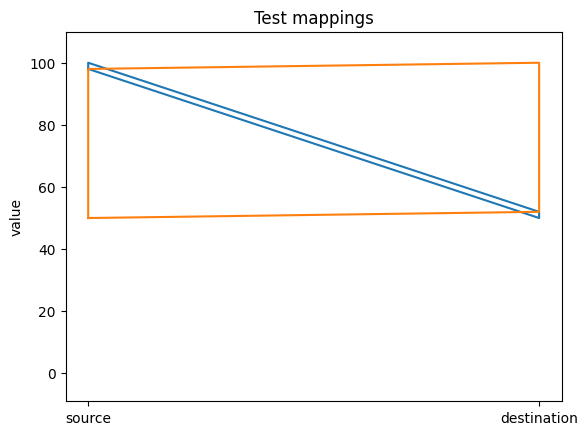

In [75]:
class Mapper:
    """does on-the-fly mappings to save having to store big lists"""
    def __init__(self, mappings: list[list[int, int, int]]):
        self._mappings = mappings
    
    def convert(self, value: int) -> int:
        """uses the mapping values to figure out how to convert the value"""
        for dest, sour, widt in self._mappings:
            if sour <= value < sour + widt:
                return dest + (value - sour)
        else:
            return value
    
    def plot(self, ax: plt.Axes, x: tuple = (0, 1)) -> None:
        """pops mappings onto an axis"""
        x0, x1 = x
        x_series = [x0, x1, x1, x0, x0]
        for dest, sour, widt in self._mappings:
            series =[sour, dest, dest + widt, sour + widt, sour]
            ax.plot(x_series, series)
    

# this is from the example
mapper = Mapper([[50, 98, 2], [52, 50, 48]])

def mapping_plot(
    mappings: [str, Mapper], title: str,
    y_limits: tuple[int] = None
) -> None:
    """sets up a plot with a series of mappers"""
    fig, ax = plt.subplots()
    x_vals = list(range(len(mappings) + 1))
    for (name, mapper), x0, x1 in zip(mappings, x_vals[:-1], x_vals[1:]):
        mapper.plot(ax, (x0, x1))
    ax.set_xticks(x_vals)
    ax.set_xticklabels(
        [name.split('-to-')[0] for name, _ in mappings] +
        [mappings[-1][0].split('-to-')[-1]]
    )
    ax.set_ylabel('value')
    ax.set_title(title)
    if y_limits is not None:
        offset = y_limits[1] * 0.1
        ax.set_ylim(y_limits[0] - offset, y_limits[1] + offset)

mapping_plot(
    [['source-to-destination', mapper]], 'Test mappings' , y_limits=(1, 100))

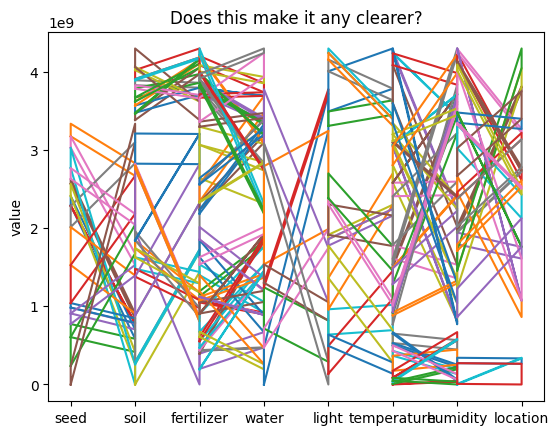

In [76]:
# ok let's convert our input to Mapper instances and see what we're up against
mappers = [[name, Mapper(mapping)] for name, mapping in mappings]
mapping_plot(mappers, 'Does this make it any clearer?')

In [77]:
paths = []
for seed in tqdm(seeds):
    temp = deepcopy(seed)
    paths.append([temp])
    for name, mapper in mappers:
        temp = mapper.convert(temp)
        paths[-1].append(temp)

100%|██████████| 20/20 [00:00<00:00, 9371.70it/s]


Text(0.5, 1.0, 'Following through...')

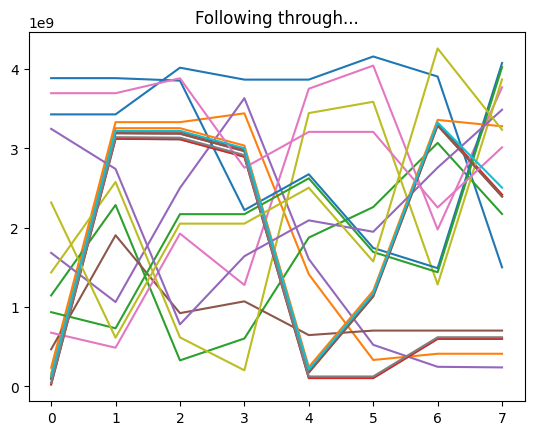

In [78]:
fig, ax = plt.subplots()
for path in paths:
    ax.plot(list(range(len(path))), path)
ax.set_title('Following through...')

In [79]:
markdown(
    '### Solution',
    f'The minimum value location is: {min([path[-1] for path in paths])}'
)

### Solution
The minimum value location is: 240320250